In [42]:
# Imports - Importação de pacotes necessários para esta aula

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
# Load Datasets - Carrega datasets necessários para esta aula 

dataset_hospital = pd.read_csv("https://www.data2learning.com/repo/datasets/hospital.csv")
dataset_homemmulher = pd.read_csv("https://www.data2learning.com/repo/datasets/basehomemmulher.csv", index_col="id")

iris = load_iris()
dataset_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

dataset_iris = sns.load_dataset('iris')


# Aula 02 - Análise e Pré-processamento de Dados

O objetivo desta aula é apresentar alguns conceitos de análise e pré-processamento de dados que nos permite entender um dataset e, consequentemente, aplicar técnicas de pré-processamento que auxiliem a aplicação de algoritmos de *Machine Learning* (ML). 

Os métodos de análise permitem ter uma visão geral de como os dados estão organizados e quais os tipos envolvidos nos atributos e rótulos. Desta forma, fica mais fácil aplicar os métodos apropriados na etapa de treinamento de um modelo. 

Já na fase de pré-processamento, pretende-se melhorar a qualidade dos dados através de técnicas que visam eliminar ou minimizar problemas como ruídos, inconsistência, duplicidade, entre outros. 

### Por que é importante fazer essa etapa antes de aplicar os algoritmos?

Conjuntos de dados são formados por objetos que representam objetos físicos ou abstratos. Cada um destes objetos é descrito a partir de um conjunto de características ou atributos. Esse conjunto também pode ser chamado de **Vetor de Características**. No entanto, esses conjuntos de dados são cada vez mais difersificado tanto em relação aos tipos de objetos que são representados quanto aos tipos de atributos que podem ser usados para representa-los.  Tal diversidade nos leva a necessidade de adequar os dados para que sejam utilizados nos algoritmos de ML. 

Isso é feito nas duas etapas ditas anteriormente. Primeiro precisamos analisar os dados para entender o tipo de atributos e a organização daquele conjunto. A partir desta análise escolhemos quais métodos de pré-processamento são mais adequados. Dentre as técnicas de pré-processamento, podemos destacar: 

* Eliminação manual de atributos
* Integração de dados 
* Amostragem de dados 
* Balanceamento de dados
* Limpeza de dados 
* Redução de dimensionalidade
* Transformação de dados

Considere a base de dados a seguir:


In [5]:
dataset_hospital

,Id,Nome,Idade,Sexo,Peso,Manchas,Temp.,#Int.,Est.,Diagnóstico
0,402,João,28,M,79,Concentradas,38.0,2,SP,Doente
1,3217,Maria,18,F,67,Inexistentes,39.5,4,MG,Doente
2,4039,Luiz,49,M,92,Espalhadas,38.0,2,RS,Saudável
3,1820,José,18,M,43,Inexistentes,38.5,8,MG,Doente
4,4340,Cláudia,21,F,52,Uniformes,37.6,1,PE,Saudável
5,2301,Ana,22,F,72,Inexistentes,38.0,3,RJ,Doente
6,1322,Marta,19,F,87,Espalhadas,39.0,6,AM,Doente
7,3027,Paulo,34,M,67,Uniformes,38.4,2,GO,Saudável


Essa base possui objetos que represetam pacientes. Para cada objeto existe um conjunto de atributos que os caracterizam: 

* Id: identificador do Paciente 
* Nome
* Idade
* Sexo
* Manchas: descreve a presença e distribuição das manchas no corpo
* Temp.: temperatura do corpo
* #Int.: número de internações
* Est: estado de origem
* Diagnóstico: indica o diagnóstico do paciente e indica o atributo alvo

Vamos entender melhor essa base de dados na seção seguinte. 

## 2.1 Análise de Dados 

Uma tarefa importante para quem trabalha com dados é ter uma visão macro das principais informações de um dataset. Essa visão consiste no uso de fórmulas estatísticas simples para extrair informações de como os dados estão organizados e os tipos de dados envolvidos. Além disso, pode-se utilizar mecanismo de visualização para entender a distribuição do conjunto de dados. 

> "Formalmente, os dados podem ser representados por uma matriz de objetos $X_n^d$, em que $n$ é o número de objetos e $d$ é o número de atributos de entrada de cada objeto. O valor de $d$ define a dimensionalidade dos objetos ou do espaço de objetos. Cada elemento dessa matriz, $x_i^j$ ou $x_{ij}$, contém o valor da $j$-ésima característica para o $i$-ésimo objeto. Os $d$ atributos também podem ser vistos como um conjunto de eixos ortogonais e os objetos, como pontos no espaço de dimensão $d$, chamado de espaços de objetos."

Por exemplo, considere os dados a seguir:

In [4]:
dataset_homemmulher

,peso,altura,classe
id,,,
1,50,1.60,0
2,53,1.65,0
3,60,1.58,0
4,62,1.62,0
5,91,1.75,1
6,102,1.85,1
7,105,1.82,1
8,103,1.77,1
9,87,1.73,1


Esses dados podem ser representados pela matriz de objetos $X_n^d$, onde $n=9$ e $d=2$ e por um plano cartesiano (dois eixos ortogonais). Cada eixo, representa um atributo que caracteriza o objeto. 

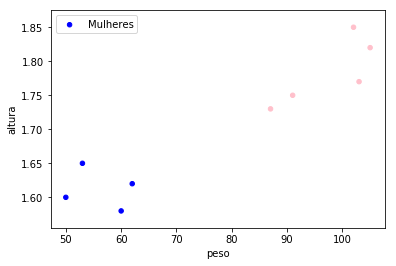

In [10]:
colors = {0:'blue', 1:'pink'}
ax = dataset_homemmulher.plot(kind='scatter', x='peso', y='altura',c=dataset_homemmulher['classe'].apply(lambda x: colors[x]))
ax.legend(["Mulheres", "Homens"])

A classe dos objetos não representam eixos cartesiano e é usada para identificar o rótulo de cada objeto. Neste caso, o azul representa as mulheres e o rosa representa os homens. 

Inicialmente, vamos analisar os atributos a partir de dois aspectos: tipo e escala. Para isto, vamos voltar a trabalhar com a base de dados de informações do hospital. 

In [19]:
dataset_hospital

,Id,Nome,Idade,Sexo,Peso,Manchas,Temp.,#Int.,Est.,Diagnóstico
0,402,João,28,M,79,Concentradas,38.0,2,SP,Doente
1,3217,Maria,18,F,67,Inexistentes,39.5,4,MG,Doente
2,4039,Luiz,49,M,92,Espalhadas,38.0,2,RS,Saudável
3,1820,José,18,M,43,Inexistentes,38.5,8,MG,Doente
4,4340,Cláudia,21,F,52,Uniformes,37.6,1,PE,Saudável
5,2301,Ana,22,F,72,Inexistentes,38.0,3,RJ,Doente
6,1322,Marta,19,F,87,Espalhadas,39.0,6,AM,Doente
7,3027,Paulo,34,M,67,Uniformes,38.4,2,GO,Saudável


A informação de **tipo** permite analisar os atributos a partir de duas representações: quantidade e qualidade. Os atributos que representam **quantidade** são chamados de atributos quantitativos ou numéricos, já os que representam **qualidade** são chamados de qualitativos, simbólicos ou categóricos. Os qualitativos podem ter seus valores ordenados. No entanto, operações aritméticas não são válidas. Já os atributos quantitativos podem ser ordenados e modificados por meio de operações aritméticas. 

Ainda sobre os atributos quantitativos, os mesmos podem ser classificados em **contínuo** e **discreto**. Atributos contínuos podem assumir um número infinito de valores. Geralmente esses atritbutos são resultados de medidas. Frequentemente, esses valores são representados por números reais. Já os atributos discretos contém um número finito  ou infinito contável de valores. 

Já a informação de **escala** define quais operações podem ser realizadas sobre os valores do atributo. Os atributos qualitativos podem ser classificados em relação a escala em **nominais** e **ordinais**. Já os quantitativos, podem ser classificados em **intervalares** e **racionais**. No caso dos atributos nominais, os valores são representados por nomes diferentes e carregam a menor quantidade de informação possível. Nesse tipo de atributo não existe uma relação de ordem. Logo, as operações válidas são as de igualdade e desigualdade. Já no atributo ordinal, existe uma relação uma relação de ordem. Logo, além das operações de igualdade e desigualdade temos: : $<, \leq, >, \geq$. Os atributos intervalares são representados por números que variam dentro de um intervalo. Para este tipo de atributo é possível definir tanto ordem quanto a diferença de magnitude entre dois valores. Já os atributos racionais, não estão inseridos em um intervalo. 

Vamos classificar os atributos da tabela base de dados do hospital:

| Atributo | Tipo | Escala |
|:-----------:|:---------------------:| :-----------------:|
| Id | Qualitativo | Nominal |
| Nome | Qualitativo | Nominal |
| Idade | Quantitativo discreto | Racional |
| Sexo | Qualitativo | Nominal |
| Peso | Quantitativo contínuo | Racional |
| Manchas | Qualitativo | Nominal |
| Temp. | Quantitativo contínuo | Intervalar |
| #Int. | Quantitativo discreto | Racional |
| Est. | Qualitativo | Nominal |
| Diagnóstico | Qualitativo | Nominal |



## 2.2 Exploração dos Dados

Assim como a análise, a exploração de dados nos permite extrair uma série de informações úteis para entender melhor o conjunto de dados que estamos trabalhando. Uma forma simples de extrair informações é utilizando a estatística descritiva que utiliza medidas que permitem resumir de forma quantitativa as principais características de um conjunto de dados. Medidas como frequência, tendência central, dispersão e distribuição dos dados são extraídas nesta etapa. 

A **frequência** representa a proporção de vezes que um atributo assume um dado valor em um determinado conjunto de dados. Por exemplo, qual a porcentagem de pacientes que possuem manchas? Se analisarmos os dados médicos, vamos ver que $62,5\%$ dos pacientes possuem. 

Para as demais medidas elas sofrem influência da classificação dos dados em **univariados** (quando o conjunto de dados possuem apenas um atributo) e **multivariados** (quando o conjunto possui mais de um atributo). 

As **medidas de localidade** representam valores de referência nos dados. Por exemplo, média, mediana, moda. Qual medida utilizar dependente também se os dados são númericos ou simbólicos. Para dados simbólicos, normalmente utilizamos a moda (valor encontrado com maior frequência). Já para os dados numéricos podemos usar a média ou a mediana. Vale ressaltar que métricas como a média são sensíveis a *outliers* (valores que distorcem bastante do conjunto de valores) nos dados. Por exemplo, se vocês tem um atributo e esse atributo possui um valor muito alto em relação aos demais, a média vai ser influenciada por ele. Isso pode ser contornado com o uso da mediana (o valor central a partir dos dados ordenados) ou da média truncada (que remove os valores dos extremos). Outra formaa de visualizar a localidade é através das medidas *quartis* e *percentis*. Assim como a mediana, os quartis dividem os valores ordenados em quartos. 

Uma forma de visualizar a distribuição dos dados é a partir de métodos de visualização, como, por exemplos, boxplots, histogramas e scatter plots. Vamos analisar algumas métricas e visualizar alguns dados a partir da base do iris apresentada na aula passada. 

O método *describe()* permite enxergar algumas destas informações. 

In [21]:
dataset_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Uma forma de visualizar os quartis e como um determinado atributo varia é utilizando os *boxplots*.

<img src="http://www.portalaction.com.br/sites/default/files/resize/EstatisticaBasica/figuras/boxplot1-700x354.png" />

O *bloxplot* é uma ferramenta interessante para avaliar como os dados se comportam. Principalmente, para identificar *outliers*. O gráfico a seguir mostra o *bloxplot* para um dos atributos da base iris (no caso, *sepal length*).

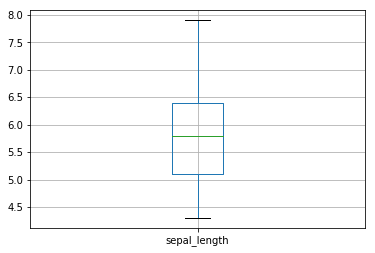

In [22]:
boxplot = dataset_iris.boxplot(column=["sepal_length"])

Vamos visualizar o gráfico do atributo *sepal length*.

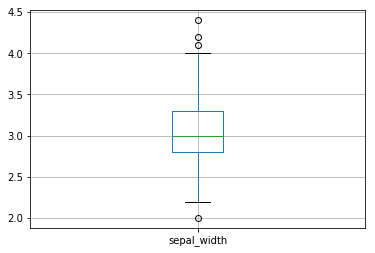

In [23]:
boxplot = dataset_iris.boxplot(column=["sepal_width"])

Os valores destacados são *outliers*, ou seja, valores discrepantes do restante da base de dados. 

Em relação às medidas de *espelhamento*, temos: intervalo, variância e desvio padrão para serem analisados. O **intervalo** é a medida mais simples e mostra o espelhamento máximo entre os valores. Ele é calculado a partir da diferença do menor e maior valor de um atributo. 

Isso pode ser calculado facilmente pelo pandas, utilizando o seguinte código:

In [32]:
dataset_iris_features = dataset_iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
dataset_iris_features.max() - dataset_iris_features.min()

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64

No entanto, para alguns casos, o intervalo não é suficiente para você analisar o espalhamento de uma base dados. Por exemplo, se você tiver muitos valores próximos de um determinado ponto e alguns discrepantes, a medida intervalo não vai representar tão bem a dispersão daqueles dados. Uma outra métrica mais interessante é a **variância**, que representa a diferença de cada valor para a média. No pandas, podemos calcular a variância da  seguinte forma: 

In [35]:
dataset_iris.var()

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

Outra medida que podem ser utilizadas para fazer a análise de dispersão dos dados é o **desvio padrão**. O desvio padrão indica quanto os dados estão afastados da média. Um valor alto, indica que os dados estão mais espalhados. Um valor baixo, indica que os valores estão mais próximos da média. No pandas, temos:

In [36]:
dataset_iris.std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

Para a análise de **distribuição** podemos olhar para o histograma e para medidas de *momento*, mas específico as medidas de **obliquidade** (*skewness*) e **curtose** (*kurtosis*). Vamos gerar o histograma de cada atributo da base Iris. 

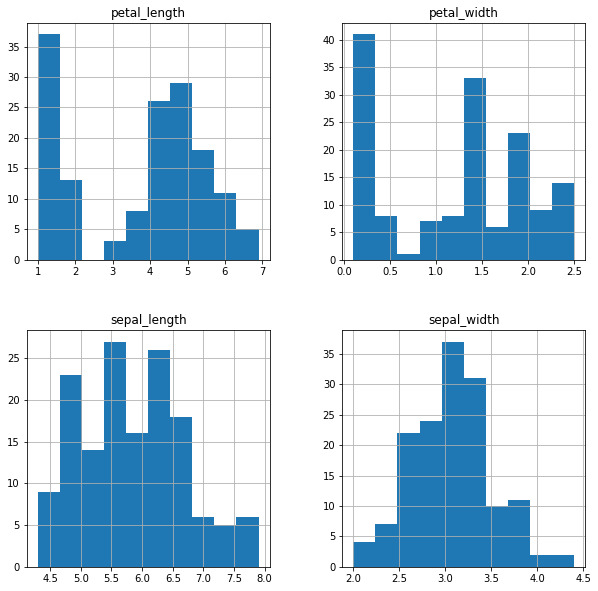

In [37]:
hist_ = dataset_iris.hist(column=["sepal_length", "sepal_width", "petal_length", "petal_width"], figsize=(10,10))

A distribuição dos valores em um conjunto de dados está associada ao valor da obliquidade da seguinte forma: 

* obliquidade = 0 (simétrica): a distribuição é aproximadamente simétrica (ocorre para uma distribuição normal).
* obliquidade > 0 (positiva): a distribuição concentra-se mais no lado esquerdo
* obliquidade < 0 (negativa): a distribuição concentra-se mais no lado direito. 

Para a base da Iris, temos:

In [38]:
dataset_iris.skew()

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

Assim como na medida de obliquidade, a seguinte relação é observado entre o valor da curtose e a distribuição dos valores em um conjunto de dados:

* curtose = 0 (normal): o histograma de distribuição dos dados apresenta o mesmo achatamento que uma distribuição normal; 
* curtose > 0 (positiva): o histograma de distribuição dos dados apresenta uma distribuição mais alta e concentrada do que a distribuição normal;
* curtose < 0 (negativa): o histograma de distribuição dos dados apresenta uma distribuição mais achatada que a distribuição normal; 

Para a base Iris, temos: 

In [39]:
dataset_iris.kurtosis()

sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64

Para dados categóricos, podemos visualizar a distribuição a partir de um grafo de pizza. No grafo a seguir, a distribuição de classes da base de dados Iris.  

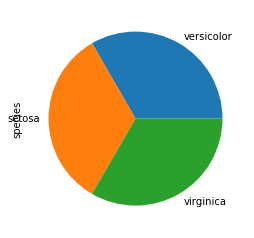

In [40]:
dataset_iris['species'].value_counts().plot(kind='pie')

As métricas utilizadas até aqui são características de dados univalorados (aqueles que possuem apenas um atributo). No entanto, a sua aplicação dados multivalorados é direta. Calculamos a métrica para cada um dos atributos, como já foi feito nos exemplos anteriores. No entanto, existem métricas que são características de dados multivalorados. Essas métricas permitem fazer análise entre dois ou mais atributos. 

A covariância entre dois atributos mede o grau com que os atributos variam juntos e seu valor depende da magnitude deles. Um valor próximo de zero indica que não existe uma correlação linear entre estes atributos.  Um valor positivo, indica que essa relação é direta. Ou seja, o aumento de um implica no aumento do outro. Caso, o valor seja negativo a relação é contrária (a redução de um, implica na redução do outro). O problema da covariância é que ela é afetada pela dimensão dos atributos. Para eliminar essa dependência, utiliza-se a correlação. Por conta disso, essa medida é mais utilizada para explorar dados multivariados. 

Para visualizar essa relação podemos utilizar o *scatter plot*. Vamos analisar o scatter plot da base de dados Iris. 

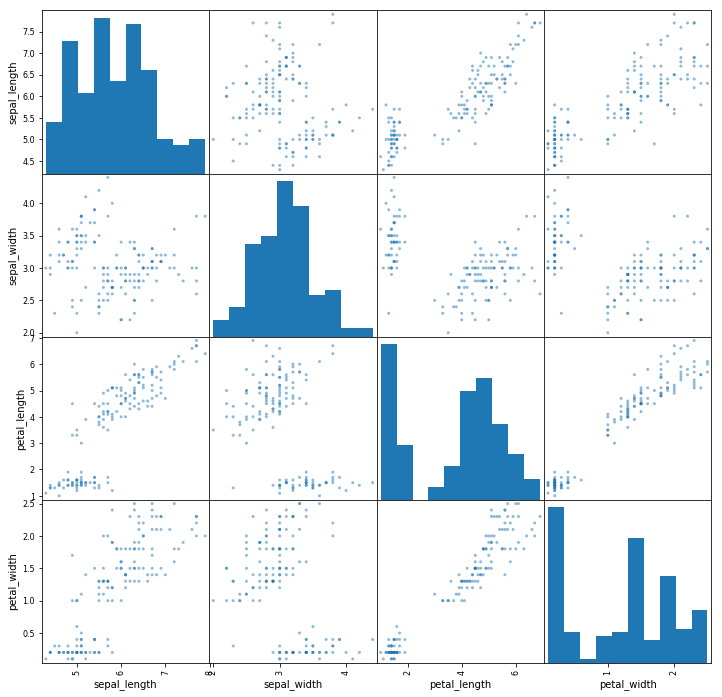

In [46]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
scatter = scatter_matrix(dataset_iris[attributes], figsize=(12,12), diagonal='hist')

Podemos gerar uma visualização melhor desse gráfico, utilizando a bliblioteca `seaborn`. 

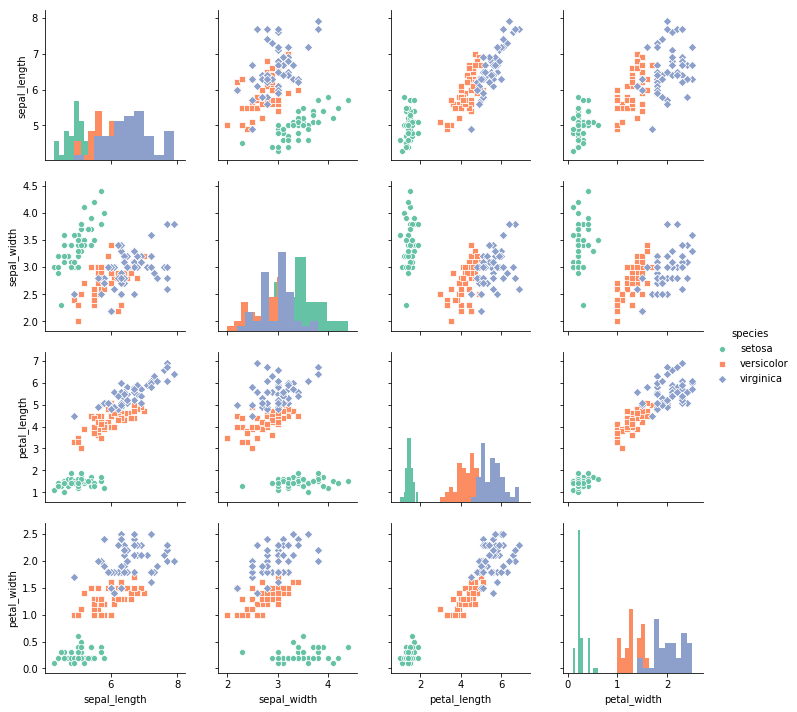

In [44]:
sns.pairplot(dataset_iris, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2",diag_kind="hist")
plt.show()

# 2.2 Pré-Processamento de Dados

In [47]:
dataset_hospital

,Id,Nome,Idade,Sexo,Peso,Manchas,Temp.,#Int.,Est.,Diagnóstico
0,402,João,28,M,79,Concentradas,38.0,2,SP,Doente
1,3217,Maria,18,F,67,Inexistentes,39.5,4,MG,Doente
2,4039,Luiz,49,M,92,Espalhadas,38.0,2,RS,Saudável
3,1820,José,18,M,43,Inexistentes,38.5,8,MG,Doente
4,4340,Cláudia,21,F,52,Uniformes,37.6,1,PE,Saudável
5,2301,Ana,22,F,72,Inexistentes,38.0,3,RJ,Doente
6,1322,Marta,19,F,87,Espalhadas,39.0,6,AM,Doente
7,3027,Paulo,34,M,67,Uniformes,38.4,2,GO,Saudável
